In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json

In [2]:
timeslot = 200000

In [3]:
time=np.sin(np.arange(0, timeslot, 1));
pm25=np.random.normal(90,15,timeslot)
humid=np.random.normal(50,15,timeslot)

In [4]:
max_temp=1
seasonal=np.arange(0,max_temp,max_temp/timeslot)
seasonal_pm=np.arange(0,10,10/timeslot)

In [5]:
temp_flux=np.random.rand(len(time)) * (3)

In [6]:
basetmp=30
temp=temp_flux+basetmp+seasonal
pm25=pm25+seasonal_pm

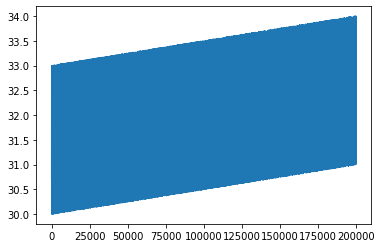

In [7]:
plt.plot(temp)

In [8]:
from datetime import date, timedelta

sdate = date(1997,3,22)   # start date
edate = date(2020,4,9)   # end date

In [9]:
index=pd.date_range(sdate,edate-timedelta(days=1),freq='H')

In [10]:
date_index=index[:len(temp)]

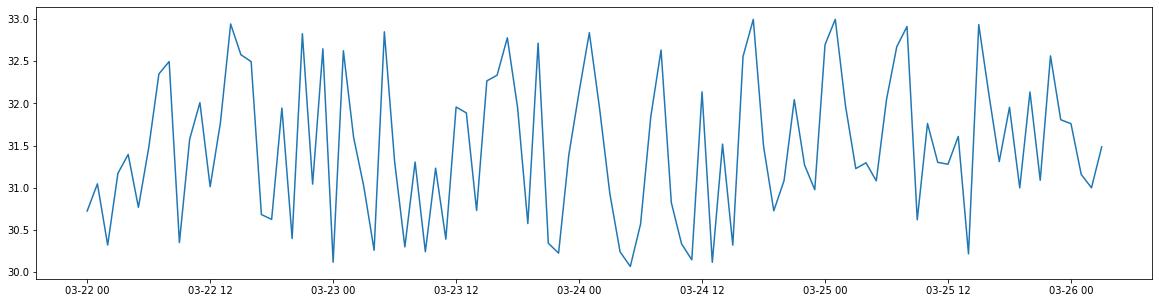

In [11]:
plt.figure(figsize=(20,5))
plt.plot(date_index[:100],temp[:100])

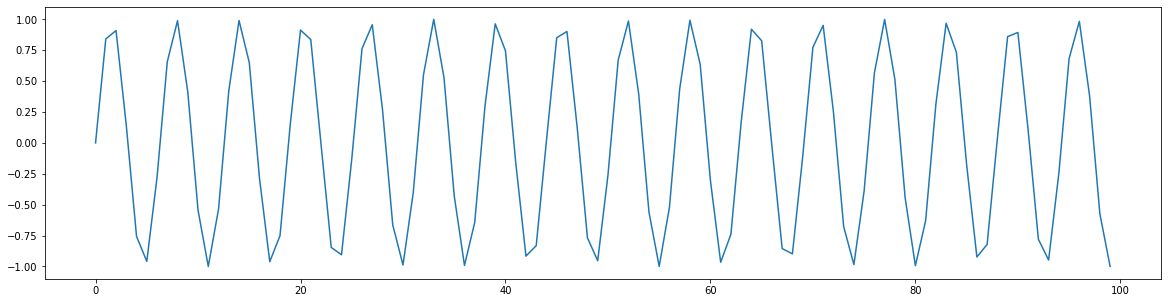

In [12]:
plt.figure(figsize=(20,5))
plt.plot(time[:100])

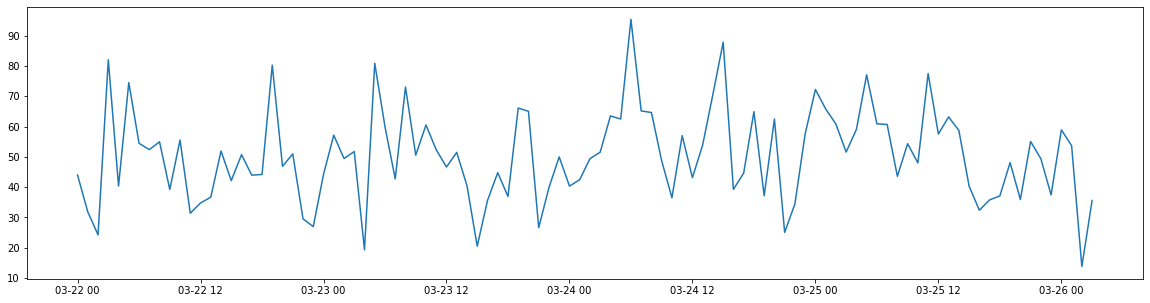

In [13]:
plt.figure(figsize=(20,5))
plt.plot(date_index[:100],humid[:100])

In [14]:
df=pd.DataFrame(date_index,columns=['timestamp'])

In [15]:
df['temperature'] = pd.Series(temp, index=df.index)
df['humidity'] = pd.Series(humid, index=df.index)
df['pm25'] = pd.Series(pm25, index=df.index)

In [16]:
df.drop('timestamp',axis=1,inplace=True)

In [27]:
for index, row in df.iterrows():
    data={
    "temperature":row['temperature'],
    "humidity":row['humidity'],
    "pm2.5":row['pm25']
    }
    json_dump = json.dumps(data)
    print(json_dump)
    break

{"temperature": 30.725242774388583, "humidity": 43.989611817965624, "pm2.5": 58.90910630718652}


In [41]:
df.to_csv("mock_data.csv",index=False)